In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [6]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [7]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [10]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
15/15 [==============================] - 4s 6ms/step - loss: 5.5720 - accuracy: 0.0042
Epoch 2/500
15/15 [==============================] - 0s 6ms/step - loss: 5.5547 - accuracy: 0.0487
Epoch 3/500
15/15 [==============================] - 0s 6ms/step - loss: 5.5237 - accuracy: 0.0416
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 5.4150 - accuracy: 0.0536
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 5.1515 - accuracy: 0.0327
Epoch 6/500
15/15 [==============================] - 0s 6ms/step - loss: 5.1555 - accuracy: 0.0353
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 4.9818 - accuracy: 0.0486
Epoch 8/500
15/15 [==============================] - 0s 6ms/step - loss: 4.9969 - accuracy: 0.0655
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 4.9012 - accuracy: 0.0654
Epoch 10/500
15/15 [==============================] - 0s 6ms/step - loss: 4.9345 - accuracy: 0.0704
Epoch 11/

15/15 [==============================] - 0s 6ms/step - loss: 2.2523 - accuracy: 0.5937
Epoch 83/500
15/15 [==============================] - 0s 5ms/step - loss: 2.3125 - accuracy: 0.5287
Epoch 84/500
15/15 [==============================] - 0s 6ms/step - loss: 2.3200 - accuracy: 0.5424
Epoch 85/500
15/15 [==============================] - 0s 6ms/step - loss: 2.2531 - accuracy: 0.5345
Epoch 86/500
15/15 [==============================] - 0s 6ms/step - loss: 2.1990 - accuracy: 0.5754
Epoch 87/500
15/15 [==============================] - 0s 6ms/step - loss: 2.2215 - accuracy: 0.5808
Epoch 88/500
15/15 [==============================] - 0s 6ms/step - loss: 2.1529 - accuracy: 0.6066
Epoch 89/500
15/15 [==============================] - 0s 6ms/step - loss: 2.1758 - accuracy: 0.5900
Epoch 90/500
15/15 [==============================] - 0s 5ms/step - loss: 2.1653 - accuracy: 0.5985
Epoch 91/500
15/15 [==============================] - 0s 6ms/step - loss: 2.1172 - accuracy: 0.6105
Epoch 92/500


15/15 [==============================] - 0s 5ms/step - loss: 0.8769 - accuracy: 0.8967
Epoch 164/500
15/15 [==============================] - 0s 6ms/step - loss: 0.9548 - accuracy: 0.8582
Epoch 165/500
15/15 [==============================] - 0s 6ms/step - loss: 0.9512 - accuracy: 0.8562
Epoch 166/500
15/15 [==============================] - 0s 6ms/step - loss: 0.9098 - accuracy: 0.8857
Epoch 167/500
15/15 [==============================] - 0s 6ms/step - loss: 0.9144 - accuracy: 0.8704
Epoch 168/500
15/15 [==============================] - 0s 6ms/step - loss: 0.8836 - accuracy: 0.8924
Epoch 169/500
15/15 [==============================] - 0s 6ms/step - loss: 0.9154 - accuracy: 0.8801
Epoch 170/500
15/15 [==============================] - 0s 6ms/step - loss: 0.9213 - accuracy: 0.8678
Epoch 171/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9032 - accuracy: 0.8843
Epoch 172/500
15/15 [==============================] - 0s 7ms/step - loss: 0.8782 - accuracy: 0.8887
Epoc

15/15 [==============================] - 0s 7ms/step - loss: 0.4105 - accuracy: 0.9486
Epoch 245/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4434 - accuracy: 0.9224
Epoch 246/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3803 - accuracy: 0.9505
Epoch 247/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4416 - accuracy: 0.9266
Epoch 248/500
15/15 [==============================] - 0s 5ms/step - loss: 0.3638 - accuracy: 0.9554
Epoch 249/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4051 - accuracy: 0.9358
Epoch 250/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3824 - accuracy: 0.9529
Epoch 251/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3879 - accuracy: 0.9372
Epoch 252/500
15/15 [==============================] - 0s 7ms/step - loss: 0.4102 - accuracy: 0.9385
Epoch 253/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3798 - accuracy: 0.9402
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.2397 - accuracy: 0.9410
Epoch 325/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2478 - accuracy: 0.9343
Epoch 326/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2230 - accuracy: 0.9580
Epoch 327/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2201 - accuracy: 0.9491
Epoch 328/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2404 - accuracy: 0.9420
Epoch 329/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2197 - accuracy: 0.9497
Epoch 330/500
15/15 [==============================] - 0s 7ms/step - loss: 0.2123 - accuracy: 0.9491
Epoch 331/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2435 - accuracy: 0.9389
Epoch 332/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2135 - accuracy: 0.9438
Epoch 333/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2262 - accuracy: 0.9407
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.1657 - accuracy: 0.9566
Epoch 406/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1805 - accuracy: 0.9374
Epoch 407/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1712 - accuracy: 0.9474
Epoch 408/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1771 - accuracy: 0.9516
Epoch 409/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1731 - accuracy: 0.9501
Epoch 410/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1588 - accuracy: 0.9570
Epoch 411/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1348 - accuracy: 0.9721
Epoch 412/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1628 - accuracy: 0.9438
Epoch 413/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1614 - accuracy: 0.9457
Epoch 414/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1612 - accuracy: 0.9538
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.1421 - accuracy: 0.9466
Epoch 487/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1405 - accuracy: 0.9418
Epoch 488/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1423 - accuracy: 0.9363
Epoch 489/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1309 - accuracy: 0.9353
Epoch 490/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1207 - accuracy: 0.9506
Epoch 491/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1313 - accuracy: 0.9419
Epoch 492/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1104 - accuracy: 0.9617
Epoch 493/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1278 - accuracy: 0.9562
Epoch 494/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1290 - accuracy: 0.9518
Epoch 495/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1237 - accuracy: 0.9470
Epoc

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

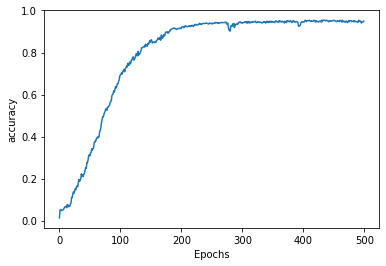

In [12]:
plot_graphs(history, 'accuracy')


In [13]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Laurence went to dublin the nice girls and reel again relations relations all mad at me lanigans ball relations ball for lanigans ball ball ball ball the ribbons they mavrone creature entangled entangled entangled entangled entangled tea tea tea tea dancing replied his wall wall wall man again again wall again the wall wall wall wall the glisten glisten reel relations relations of lanigans ball ball ball ball relations water for lanigans ball ball ball ball the ribbons they mavrone creature entangled entangled entangled entangled entangled tea tea tea tea dancing replied his wall wall wall man again again wall again the wall wall
